<a href="https://colab.research.google.com/github/Akshay-Patel07/LetsUpgrade--AI--ML/blob/master/WALMART_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WALMART CASE STUDY**

**Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.**

**Defining Problem Statement and Analyzing basic metrics.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

In [ ]:
df=pd.read_csv('walmart_data.csv')

In [ ]:
#Provides the first 10 lines/series of the dataframe
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
#To describe the characterstics of the data we use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#generates summary statistics of numerical (and sometimes categorical) columns in a DataFrame
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
#Describes number of rows and columns ,so there are 550068 rows and 10 columns
df.shape

(550068, 10)

Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
#There are no such null values present in the table
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
#It explains the number of duplicate values
df.duplicated().sum()

0

In [ ]:
#It describes the unique values in the every columns
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
#There are 3631 products and P00265242 is among the top product.
df['Product_ID'].value_counts()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00314842,1
P00298842,1
P00231642,1


In [ ]:
#Majority of the customers are unmarried
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Majority of customers is from the age group of 26-35
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
#Males are the major customeres in walmart
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
#City category among them which are the highest buyers
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


In [ ]:
df['User_ID'].value_counts()

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1002690,7
1002111,7
1005810,7


In [ ]:
#To describe the unique values in the dataframe.
{col: df[col].unique() for col in df.columns}

{'User_ID': array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529]),
 'Product_ID': array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
        'P00371644', 'P00370853'], dtype=object),
 'Gender': array(['F', 'M'], dtype=object),
 'Age': array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
       dtype=object),
 'Occupation': array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6]),
 'City_Category': array(['A', 'C', 'B'], dtype=object),
 'Stay_In_Current_City_Years': array(['2', '4+', '3', '1', '0'], dtype=object),
 'Marital_Status': array([0, 1]),
 'Product_Category': array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
         9, 20, 19]),
 'Purchase': array([ 8370, 15200,  1422, ...,   135,   123,   613])}

Visual Analysis - Univariate & Bivariate

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


(0.0, 1.0, 0.0, 1.0)

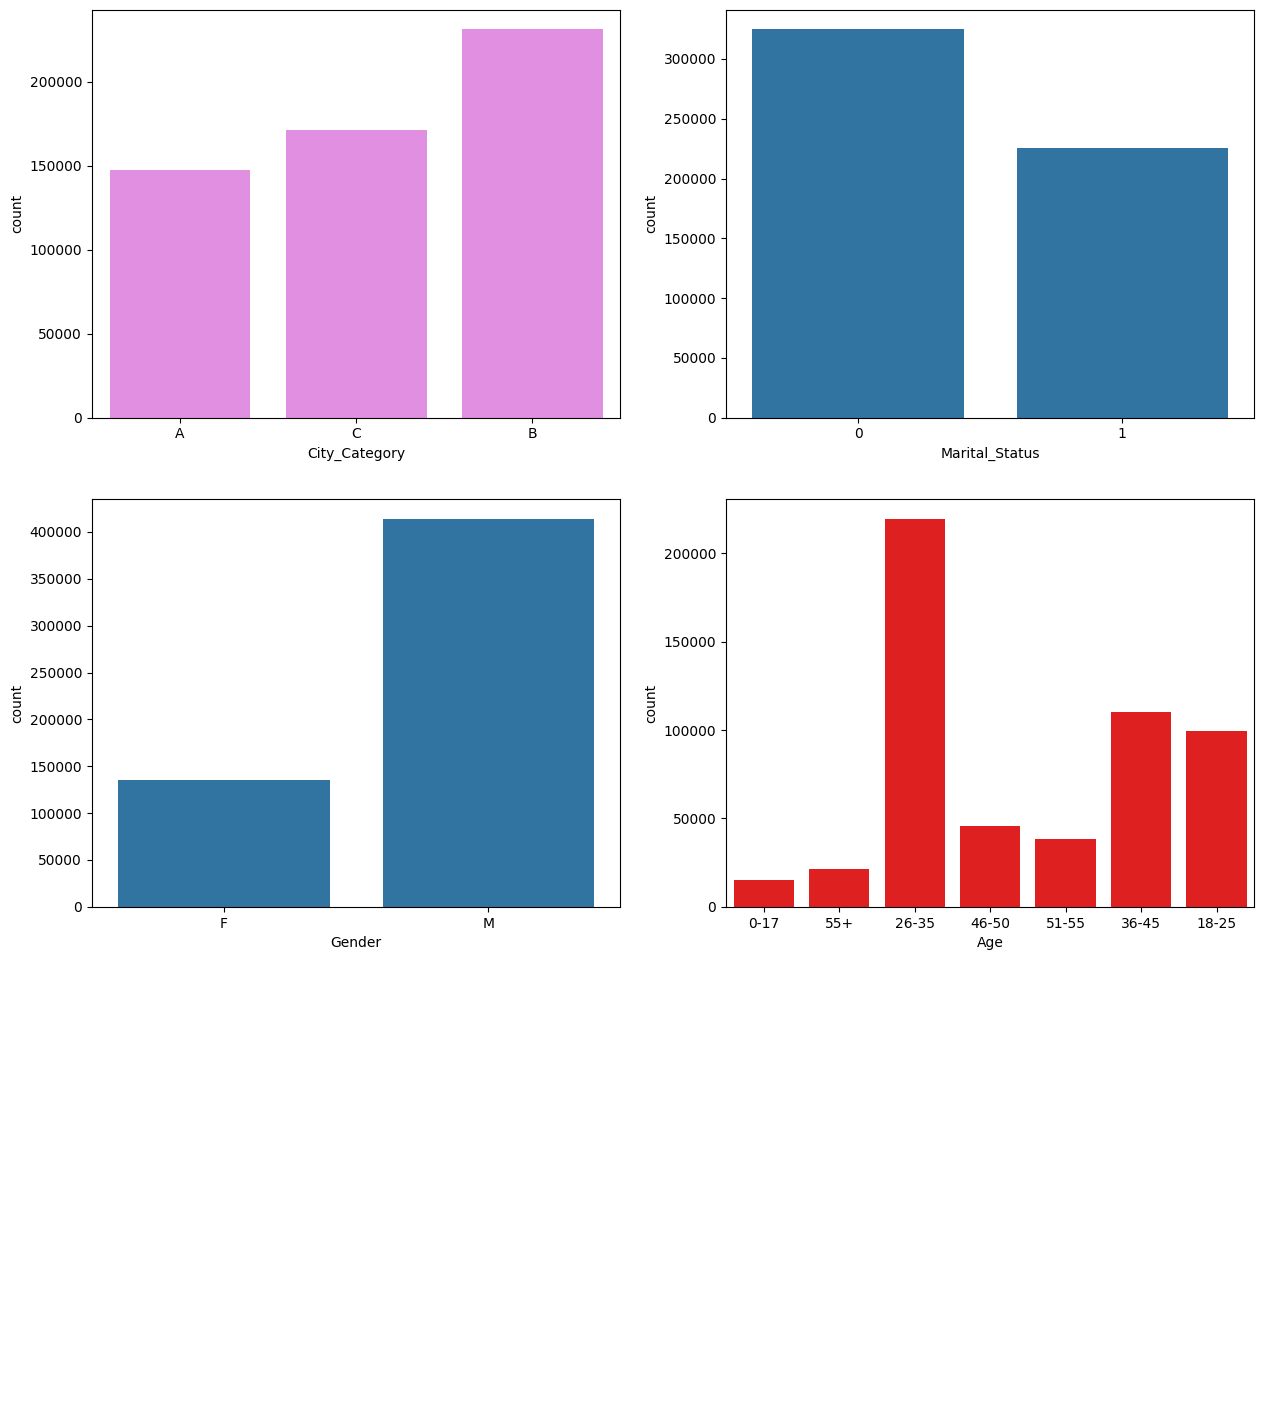

In [ ]:
#Univariate
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
sns.countplot(x="Gender", data=df, ax=axes[1, 0])  # Plot in (1,0)
sns.countplot(x="Age", data=df, ax=axes[1, 1],color='r')  # Plot in (1,1)
sns.countplot(x="City_Category", data=df, ax=axes[0, 0],color='violet')  # Plot in (0,0)
sns.countplot(x="Marital_Status", data=df, ax=axes[0, 1])  # Plot in (0,1)


axes[2, 1].axis("off")
axes[2, 0].axis("off")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,7969.0


<Axes: xlabel='Age'>

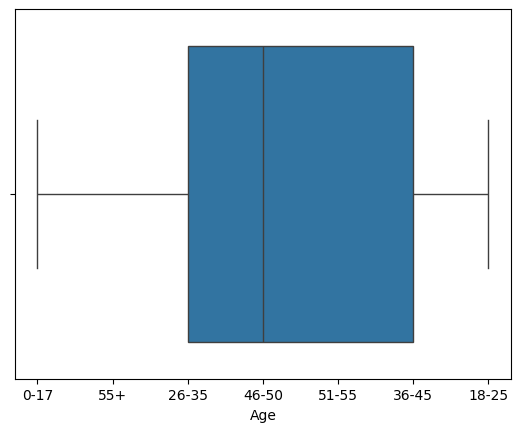

In [ ]:
#Mean age group 46-50 are the majority of people who buy at walmart.
sns.boxplot(data=df,x="Age")

<Axes: xlabel='City_Category'>

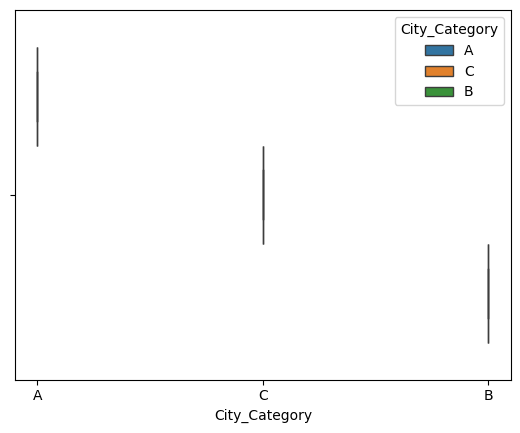

In [ ]:
sns.boxplot(data=df,x="City_Category",hue='City_Category')

<Axes: xlabel='Age', ylabel='Count'>

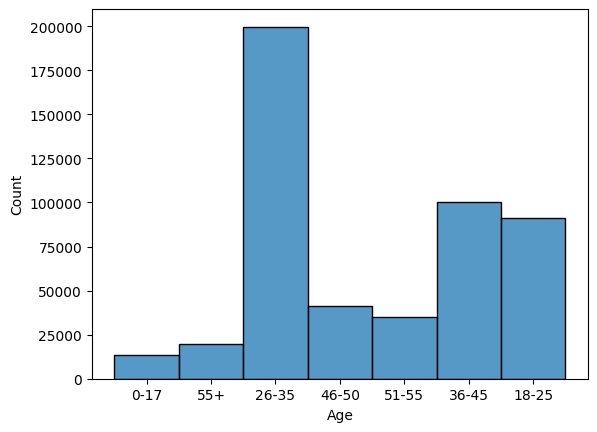

In [ ]:
sns.histplot(data=df,x="Age")

<Axes: xlabel='Occupation', ylabel='Count'>

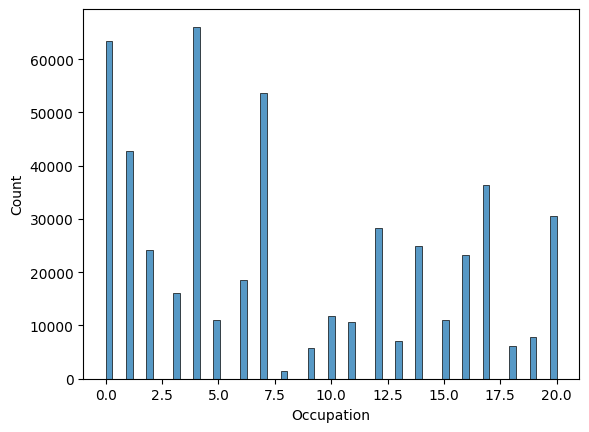

In [ ]:
sns.histplot(data=df,x="Occupation")

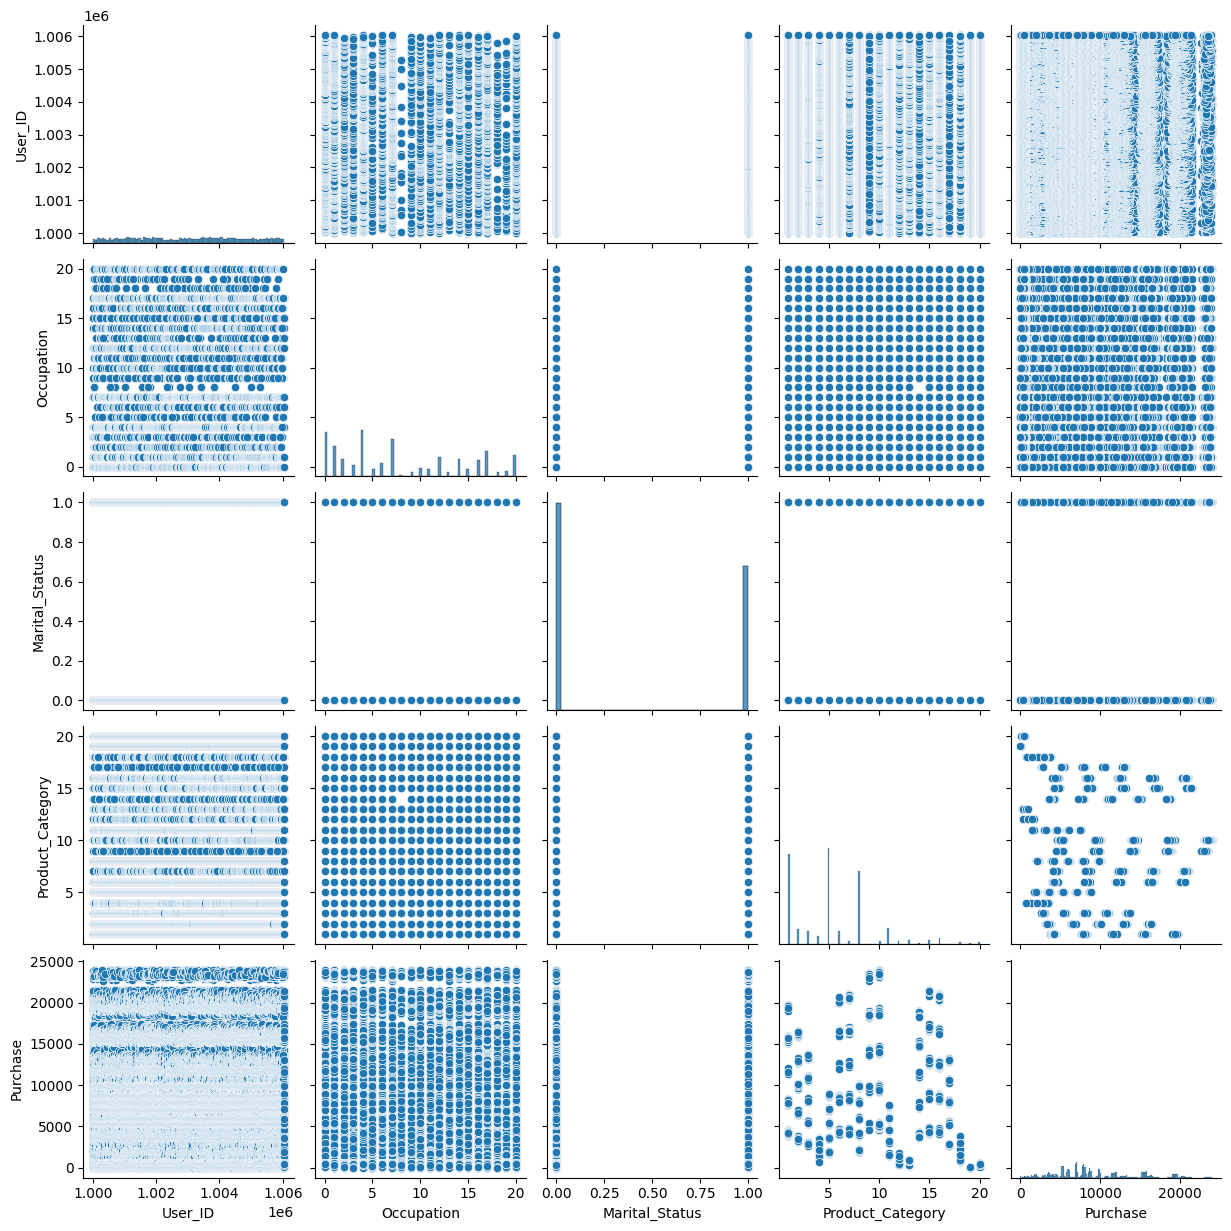

In [ ]:
sns.pairplot(df)

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,15227.0
6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,19215.0
7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15854.0
8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,15686.0
9,1000005,P00274942,M,26-35,20.0,A,1,1.0,8.0,7871.0


In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
M,0.753105
F,0.246895


<Axes: xlabel='Product_Category', ylabel='Purchase'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


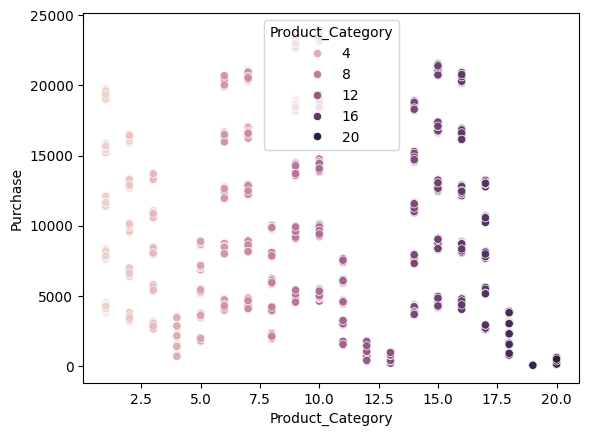

In [ ]:
sns.scatterplot(x='Product_Category',y='Purchase',hue='Product_Category',data=df)

In [ ]:
df[df['Gender']=='F']['Purchase'].mean()

8734.565765155476

In [ ]:
df[df['Gender']=='M']['Purchase'].mean()

9437.526040472265

In [ ]:
df.groupby('Gender')['User_ID'].nunique()

,User_ID
Gender,
F,1666
M,4225


In [ ]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


<Axes: xlabel='Gender', ylabel='Purchase'>

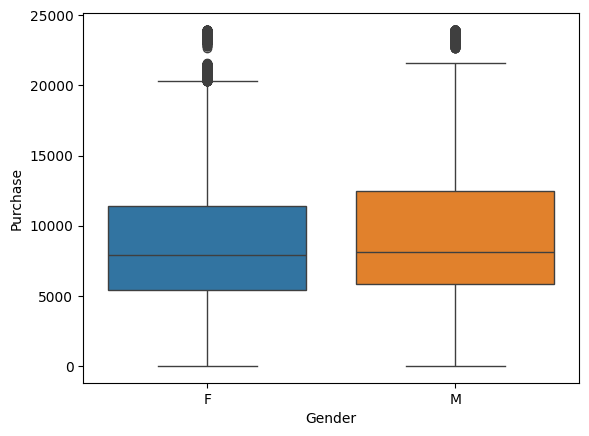

In [ ]:
sns.boxplot (x='Gender', y='Purchase',hue='Gender', data=df)


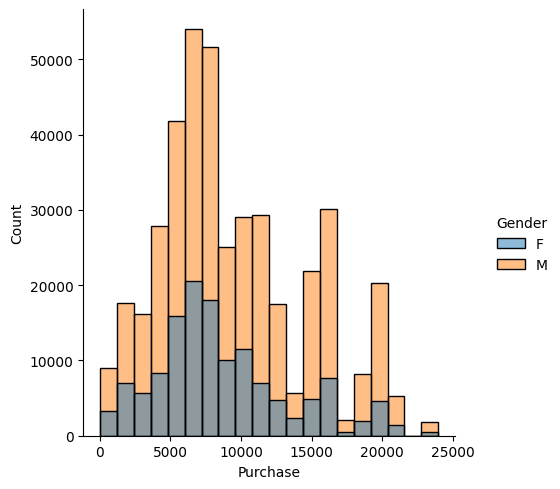

In [ ]:
sns.displot(x='Purchase', data=df, bins=20, hue='Gender')
#Females are spending more money for the purchase than females by the below graph.

In [ ]:
#Calculate the CLT and gender wise product
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,71.0,7537.239437,4436.135202,244.0,5289.0,6874.0,8668.0,19611.0
M,229.0,9145.078603,5083.361308,49.0,5864.0,7909.0,12371.0,23908.0


In [ ]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,79.0,8826.265823,4936.576702,369.0,5456.5,7888.0,10105.0,20931.0
M,221.0,9302.647059,5088.644909,604.0,5844.0,8062.0,12107.0,23234.0


In [ ]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,78.0,9180.089744,5084.007485,1436.0,5880.00,7858.5,11315.75,23722.0
M,222.0,9316.621622,4924.485921,374.0,5446.75,8424.5,11933.75,23648.0


In [ ]:
#Gender Vs Purchase
n= 500 #samples
iteration = 1000
male_sample_means= [df[df['Gender']=='M'].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]
female_sample_means= [df[df['Gender']=='F'].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]

In [ ]:
np.mean(male_sample_means)

9419.474254

In [ ]:
np.mean(female_sample_means)

8737.072291999999

<ipython-input-56-f237c2798cfe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_sample_means, bins=25)


<Axes: ylabel='Density'>

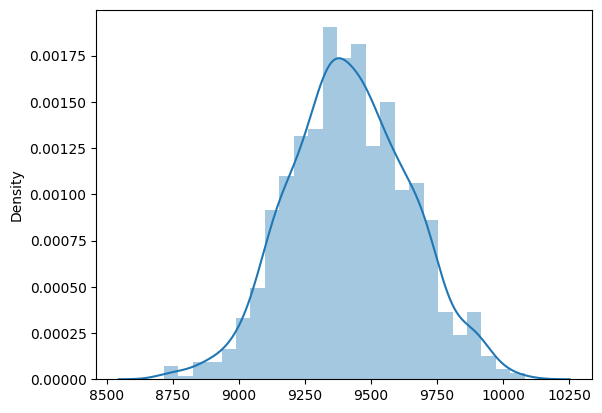

In [ ]:
sns.distplot(male_sample_means, bins=25)

<ipython-input-57-5e9f30d7170f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_sample_means, bins=25,color='red')


<Axes: ylabel='Density'>

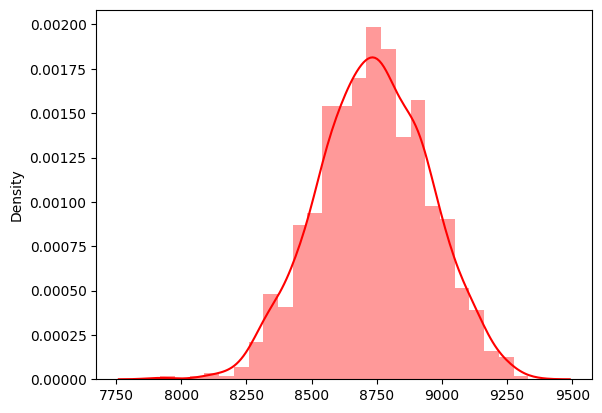

In [ ]:
sns.distplot(female_sample_means, bins=25,color='red')

In [ ]:
#calculating the CLT for 95% Confidence Interval
male_lower_range=np.mean(male_sample_means)-1.96*(np.std(male_sample_means))
male_upper_range=np.mean(male_sample_means)+1.96*(np.std(male_sample_means))

In [ ]:
(male_lower_range,male_upper_range)

(8976.679870975988, 9862.268637024014)

In [ ]:
female_lower_range=np.mean(female_sample_means)-1.96*(np.std(female_sample_means))
female_upper_range=np.mean(female_sample_means)+1.96*(np.std(female_sample_means))

In [ ]:
(female_lower_range,female_upper_range)

(8323.398384425642, 9150.746199574356)

We cannot conclude who is spending more or less.

In [ ]:
#Using Percentile
np.percentile (male_sample_means, [2.5, 97.5])

array([8996.0556, 9889.6376])

In [ ]:
np.percentile (female_sample_means, [2.5, 97.5])

array([8330.87205, 9139.81285])

In [ ]:
#calculating the CLT for 90% Confidence Interval
male_lower_range=np.mean(male_sample_means)-1.28*(np.std(male_sample_means))
male_upper_range=np.mean(male_sample_means)+1.28*(np.std(male_sample_means))

In [ ]:
(male_lower_range,male_upper_range)

(9130.302412025136, 9708.646095974866)

In [ ]:
female_lower_range=np.mean(female_sample_means)-1.28*(np.std(female_sample_means))
female_upper_range=np.mean(female_sample_means)+1.28*(np.std(female_sample_means))

In [ ]:
(female_lower_range,female_upper_range)

(8466.91790338001, 9007.226680619988)

In [ ]:
#calculating the CLT for 99% Confidence Interval
male_lower_range=np.mean(male_sample_means)-2.33*(np.std(male_sample_means))
male_upper_range=np.mean(male_sample_means)+2.33*(np.std(male_sample_means))

In [ ]:
(male_lower_range,male_upper_range)

(8893.09113540513, 9945.857372594872)

In [ ]:
female_lower_range=np.mean(female_sample_means)-2.33*(np.std(female_sample_means))
female_upper_range=np.mean(female_sample_means)+2.33*(np.std(female_sample_means))

In [ ]:
(female_lower_range,female_upper_range)

(8245.306881465176, 9228.837702534822)

Interpreting the Overlap

Possible Similarity: The overlap between $8976.68 and $9150.75 suggests male and female spending might not differ significantly. Males lower bound is close to females upper bound, indicating potential overlap in spending behavior.

Potential Difference: Males mean ($9419.47) is higher than females ($8737.07), and the male CI extends to $9862.27, far above the female max ($9150.75). This hints males might spend more, but overlap tempers this conclusion.

Since there is Close Overlap b/w the two Categories we cannot decide the result.
To Resolve the above we can-

1.Try to increase the sample Size.

2.Calculate the CI Difference between the means.

3.Consider Alternative CI Levels such as 80% of Confidence intervals.

4.Assess Practical Significance: Beyond statistical significance, consider if the difference is practically meaningful.

#Marital Status vs Purchases

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
n= 500 #samples
iteration = 1000
unmarried_sample_means= [df[df['Marital_Status']==0].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]
married_sample_means= [df[df['Marital_Status']==1].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]

In [ ]:
np.mean(unmarried_sample_means)

9271.805151999999

In [ ]:
np.mean(married_sample_means)

9265.36714

<ipython-input-87-4001ee734cb7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unmarried_sample_means,bins=25)


<Axes: ylabel='Density'>

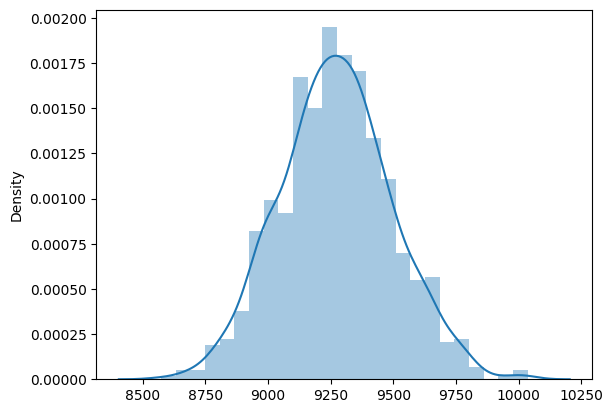

In [ ]:
sns.distplot(unmarried_sample_means,bins=25)

<ipython-input-89-b12f23547adc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(married_sample_means,bins=25,color='red')


<Axes: ylabel='Density'>

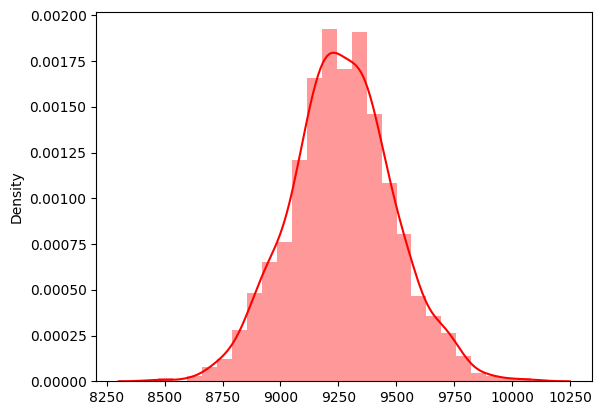

In [ ]:
sns.distplot(married_sample_means,bins=25,color='red')

In [ ]:
#calculating the CLT for 95% Confidence Interval
unmarried_lower_range=np.mean(unmarried_sample_means)-1.96*(np.std(unmarried_sample_means))
unmarried_upper_range=np.mean(unmarried_sample_means)+1.96*(np.std(unmarried_sample_means))

In [ ]:
(unmarried_lower_range,unmarried_upper_range)

(8834.602778852935, 9709.007525147063)

In [ ]:
married_lower_range=np.mean(married_sample_means)-1.96*(np.std(married_sample_means))
married_upper_range=np.mean(married_sample_means)+1.96*(np.std(married_sample_means))

In [ ]:
(married_lower_range,married_upper_range)

(8830.036321719792, 9700.697958280209)

In [ ]:
#calculating the CLT for 90% Confidence Interval
unmarried_lower_range=np.mean(unmarried_sample_means)-1.28*(np.std(unmarried_sample_means))
unmarried_upper_range=np.mean(unmarried_sample_means)+1.28*(np.std(unmarried_sample_means))

In [ ]:
(unmarried_lower_range,unmarried_upper_range)

(8986.285234842733, 9557.325069157265)

In [ ]:
married_lower_range=np.mean(married_sample_means)-1.28*(np.std(married_sample_means))
married_upper_range=np.mean(married_sample_means)+1.28*(np.std(married_sample_means))

In [ ]:
(married_lower_range,married_upper_range)

(8981.069462755782, 9549.664817244218)

There are no opt facts to conclude that which category of marital status is spending more.

#Age Vs Purchase

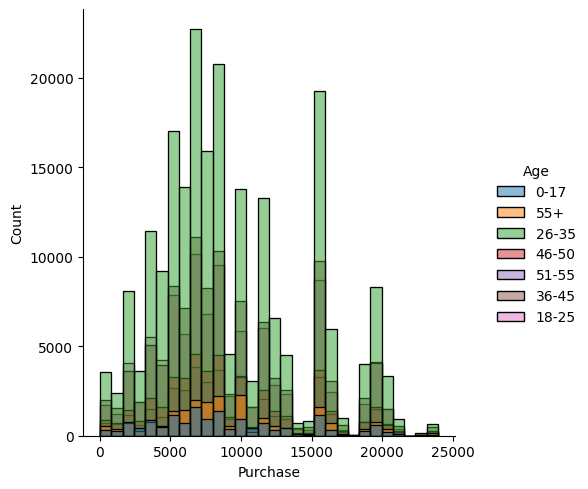

In [ ]:
sns.displot(x='Purchase', data=df, bins=30, hue='Age')

In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
n= 500 #samples
iteration = 1000

In [ ]:
below17_sample_means= [df[df['Age']=='0-17'].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]
below25_sample_means= [df[df['Age']=='18-25'].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]
below45_sample_means= [df[df['Age']=='36-45'].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]
below50_sample_means= [df[df['Age']=='46-50'].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]
below55_sample_means= [df[df['Age']=='51-55'].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]
above55_sample_means= [df[df['Age']=='55+'].sample(n, replace=True)['Purchase'].mean() for i in range(iteration)]

<Axes: ylabel='Count'>

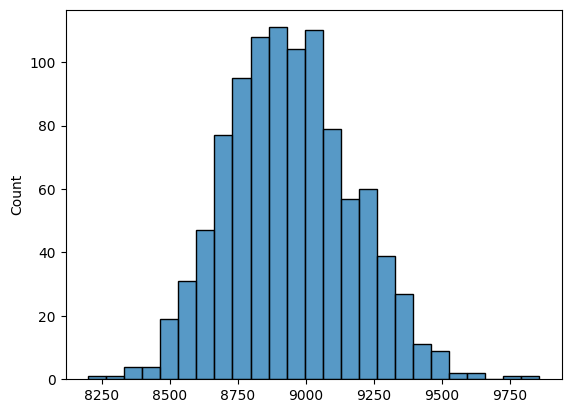

In [ ]:
sns.histplot(below17_sample_means,bins=25)

<Axes: ylabel='Count'>

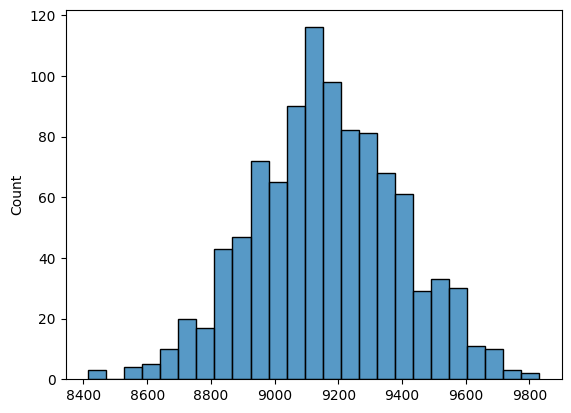

In [ ]:
sns.histplot(below25_sample_means,bins=25)

<Axes: ylabel='Count'>

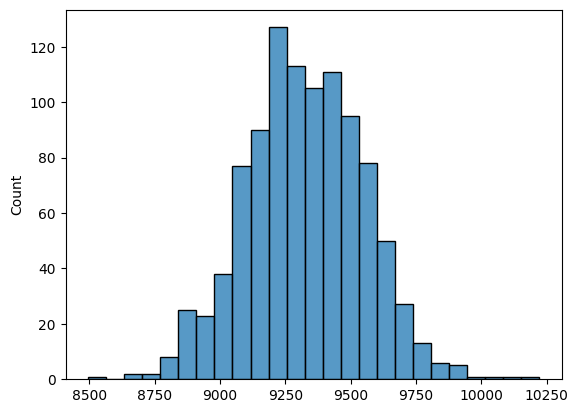

In [ ]:
sns.histplot(below45_sample_means,bins=25)

<Axes: ylabel='Count'>

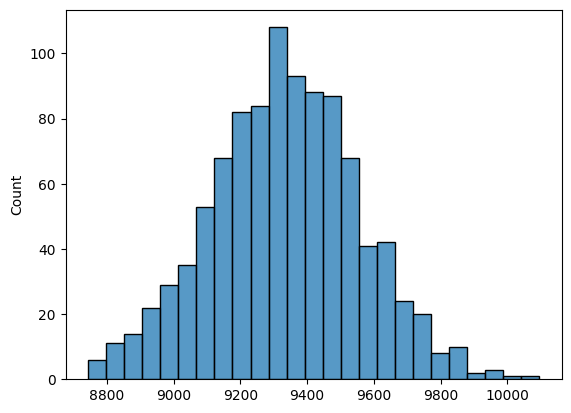

In [ ]:
sns.histplot(above55_sample_means,bins=25)

In [ ]:
#calculating the CLT for 95% Confidence Interval
below17_lower_range=np.mean(below17_sample_means)-1.96*(np.std(below17_sample_means))
below17_upper_range=np.mean(below17_sample_means)+1.96*(np.std(below17_sample_means))

In [ ]:
(below17_lower_range,below17_upper_range)

(8491.935740080828, 9237.983294192112)

In [ ]:
below25_lower_range=np.mean(below25_sample_means)-1.96*(np.std(below25_sample_means))
below25_upper_range=np.mean(below25_sample_means)+1.96*(np.std(below25_sample_means))

In [ ]:
(below25_lower_range,below25_upper_range)

(8707.314230847118, 9615.34939315288)

In [ ]:
above55_lower_range=np.mean(above55_sample_means)-1.96*(np.std(above55_sample_means))
above55_upper_range=np.mean(above55_sample_means)+1.96*(np.std(above55_sample_means))

In [ ]:
(above55_lower_range,above55_upper_range)

(8895.656356743539, 9771.732331256464)

There is a continous overlap of CLT between the age groups.Hence, there is proper understanding of which one to has the highest purchase limits.

#**Insights**


Application of CLT to Purchase Data: The confidence intervals for male and female spending provided earlier (Males: [$8976.68, $9862.27]; Females: [$8323.40, $9150.75]) overlap, suggesting no significant difference in average spending. CLT supports this by implying that with large enough samples (as likely here, given the tight intervals), the sample means are normally distributed, allowing us to use these intervals for inference.

Spending Similarity: The overlap in spending CIs aligns with CLT’s implication that sample means stabilize around the population mean, suggesting male and female spending may converge to a similar population mean.

Variability Insight: The scatterplot (Purchase vs. Product Category) shows a right-skewed distribution for Purchase amounts, with most purchases below $10,000. CLT helps us trust the CIs despite this skew, as the sample mean’s distribution normalizes with large samples.

**Comments on the Distribution of Variables and Relationships Between Them**

**Purchase Amount (Bivariate Plot):** The scatterplot of Purchase vs. Product Category shows a right-skewed distribution, with most purchases clustering below $10,000 across all product categories (4, 8, 12, 16, 20). There’s no clear linear relationship between Product Category and Purchase amount, as spending varies widely within each category.

**City Category:**The distribution is uneven, with City B having the highest count(~25,000), followed by City C (175,000), and City A (150,000). This suggests City B has the largest customer base.

**Marital Status:** More customers are unmarried (0) (225,000) than married (1) (175,000), indicating a skew toward single individuals.

**Gender:** Males (M) dominate (300,000) compared to females (F) (125,000), showing a gender imbalance in the customer base.

**Age:** The age distribution peaks at 26–35 (200,000), followed by 36–45 (125,000) and 18–25 (100,000). Older groups (51–55, 55+) and the youngest (0–17) have fewer customers, suggesting a younger-to-middle-aged customer base

**Univariate and Bivariate Plot**

**City Category (Univariate Histogram):**
Observation: City B has the most customers (225,000), followed by City C (175,000) and City A (150,000).

**Marital Status (Univariate Histogram):**
Observation: Unmarried customers (0) outnumber married ones (1) (225,000 vs. 175,000).

**Gender (Univariate Histogram):**
Observation: Males (300,000) significantly outnumber females (125,000).
Implication: While males dominate, the earlier CI overlap suggests spending is similar. Walmart can focus on gender-neutral strategies but may test male-targeted promotions (e.g., electronics) given their larger presence.

**Age (Univariate Histogram):**
Observation: The 26–35 age group is the largest (200,000), followed by 36–45 (125,000) and 18–25 (100,000). Older (51–55, 55+) and younger (0–17) groups are smaller.


**Purchase vs. Product Category (Bivariate Scatterplot):**
Observation: Purchases are right-skewed, mostly below 10,000, across Product Categories 4, 8, 12, 16, and 20. No clear pattern links Product Category to Purchase amount.


**Final Insight**

**Gender-Neutral Strategies:** The CI overlap in spending (Males: [$8976.68, $9862.27]; Females: [$8323.40, $9150.75]) and male-heavy sample suggest focusing on universal promotions, but test male-targeted campaigns (e.g., tech deals) due to their larger presence.

**City Prioritization:** Allocate more resources to City B (largest customer base) while boosting City A’s traffic with marketing (e.g., local events, discounts).

**Age Targeting:** Focus on 26–35 and 36–45 age groups with relevant products (e.g., tech, home goods), while offering niche items for smaller groups (e.g., toys for 0–17, health products for 55+).

**Marital Status Focus:** Cater to unmarried customers with single-oriented products (e.g., individual meals) but maintain family-friendly offerings for married shoppers.

**Budget-Friendly Inventory:** The right-skewed Purchase distribution (<$10,000) indicates most customers are budget-conscious. Stock affordable items across all Product Categories.

**Product Category Balance:** No category dominates spending, so maintain a balanced inventory but investigate if categories like 4 or 20 have higher average spends for targeted promotions.
]

#**RECOMMENDATIONS**

Based on the analysis of customer spending and demographics, here are 10 straightforward, actionable steps Walmart can take to improve its business. These are easy to understand and implement for anyone in the company.

**Focus on Affordable Products.** -
 Stock more budget-friendly items like groceries, clothes, and household goods that everyone can afford.

**Create Promotions for Everyone**-
Men and women spend about the same amount (around $8,000–$9,000 on average). Run sales and discounts that appeal to all shoppers, like "Family Savings Days."

**Put More Resources in City B/City C Stores**-
City B or City C  has the most customers. Send more staff, products, and promotions to those stores to keep them running smoothly and keep customers happy.

**Boost City A with Special Offers**-
City A has the fewest customers. Offer exclusive discounts or host events in City A stores to bring in more shoppers.

**Target Younger Shoppers (Ages 26–35)**-
The biggest group of customers is aged 26–35. Display trendy items like electronics, stylish clothes, and home decor that this age group loves.

**Offer Products for Single People**-
More customers are unmarried. Sell items like single-serve meals, small appliances, or personal gadgets that single people might need.

**Make Stores Welcoming for Men and Women**-
Men shop more often, but women spend similarly. Arrange stores with sections both men and women like, such as tech for men and beauty products for women, side by side.

**Test Special Deals for Different Groups**-
Try small experiments: offer tech deals for men, grocery discounts for women, or toy sales for younger customers (under 18) to see what works best.